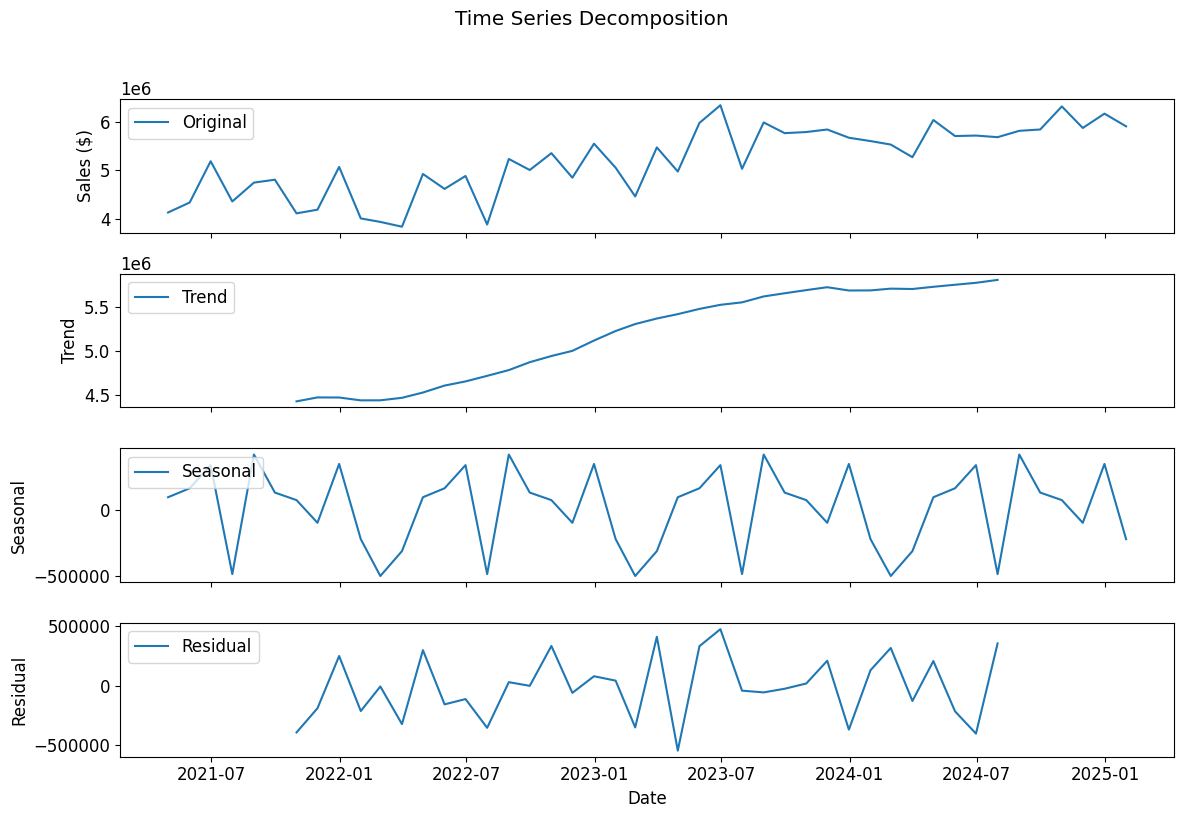

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
df = pd.read_csv("../data/sazerac_df.csv")

# Convert date column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Sort the index for time series analysis
df = df.sort_index()

# Create a time series of sales (using sale_dollars as example)
ts = df.resample('M')['sale_dollars'].sum()  # Monthly aggregation
ts = ts.ffill()  # Forward fill any missing values

# Perform seasonal decomposition
decomposition = seasonal_decompose(ts, model='additive', period=12)  # Annual seasonality

# Visualization settings
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 12})

# Plot decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)

ax1.plot(ts, label='Original')
ax1.legend(loc='upper left')
ax1.set_ylabel('Sales ($)')

ax2.plot(decomposition.trend, label='Trend')
ax2.legend(loc='upper left')
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal, label='Seasonal')
ax3.legend(loc='upper left')
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid, label='Residual')
ax4.legend(loc='upper left')
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

plt.suptitle('Time Series Decomposition', y=1.02)
plt.tight_layout()
plt.show()

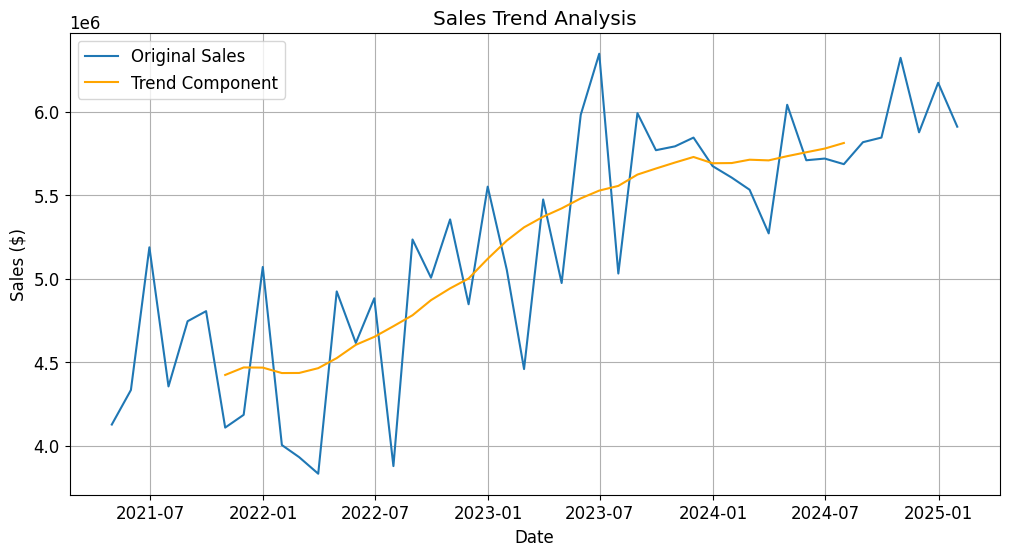

In [2]:
# Additional visualization: Trend vs Original
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Sales')
plt.plot(decomposition.trend, label='Trend Component', color='orange')
plt.title('Sales Trend Analysis')
plt.ylabel('Sales ($)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

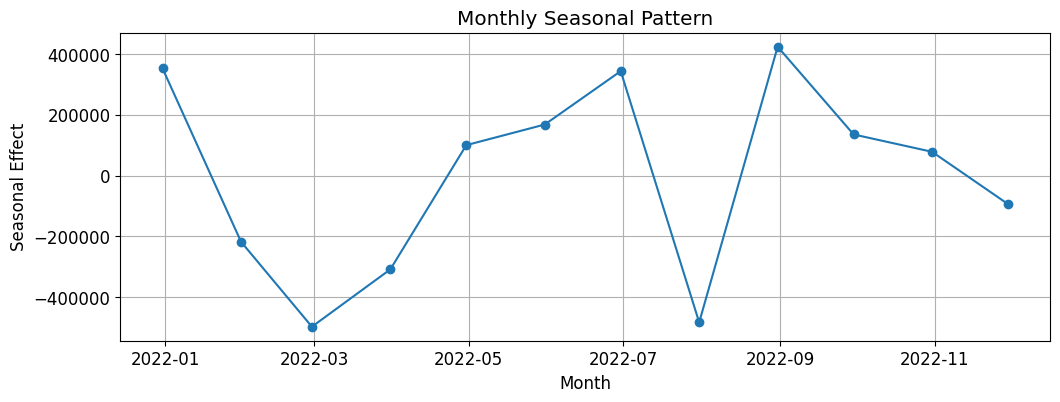

In [13]:
# Seasonal component visualization
plt.figure(figsize=(12, 4))
plt.plot(decomposition.seasonal[8:8+12], marker='o') 
plt.title('Monthly Seasonal Pattern')
plt.ylabel('Seasonal Effect')
plt.xlabel('Month')
# plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

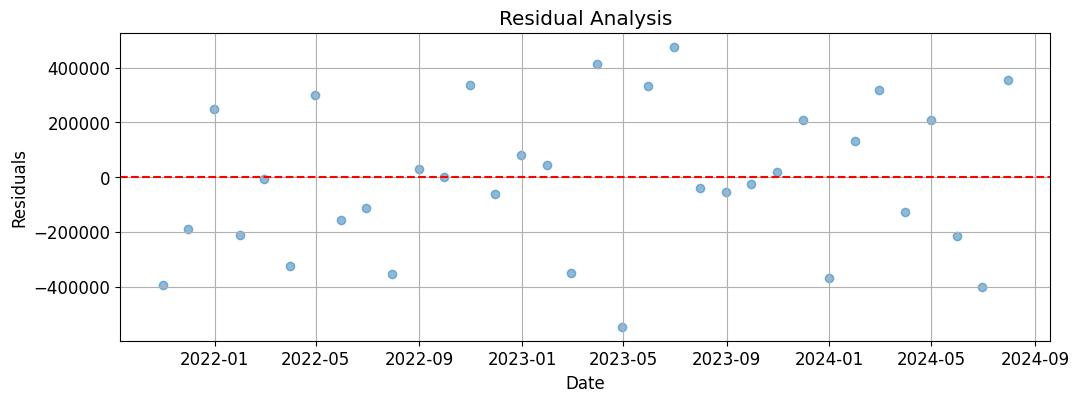

In [5]:
# Residual analysis
plt.figure(figsize=(12, 4))
plt.scatter(ts.index, decomposition.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Analysis')
plt.ylabel('Residuals')
plt.xlabel('Date')
plt.grid(True)
plt.show()